In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
plt.style.use('bmh')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from sklearn.preprocessing import *
import seaborn as sns
from sklearn.metrics import *
from keras.callbacks import *

In [2]:
data = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\GTWYElec.csv')

data.head()

,Date,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00
0,5/7/2008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,16.216,14.448,12.958,11.891,12.999,11.803,12.124,11.363,11.440,10.113
1,5/8/2008,11.593,11.033,11.285,14.218,10.644,11.374,11.047,11.375,11.461,...,15.713,14.839,11.117,11.433,11.780,11.663,11.569,12.250,13.390,14.202
2,5/9/2008,12.168,11.206,10.073,10.997,14.464,11.528,12.849,11.070,15.063,...,16.326,14.226,9.921,10.723,10.493,10.418,10.209,10.498,10.469,9.168
3,5/10/2008,10.383,10.415,10.602,10.293,10.283,10.958,10.753,10.824,10.479,...,10.468,11.864,10.572,11.757,10.873,9.828,10.056,14.093,9.173,13.779
4,5/11/2008,11.721,8.893,9.132,10.808,11.878,11.038,10.061,11.020,10.506,...,11.257,10.710,11.501,10.380,11.260,12.373,10.939,12.363,12.938,10.654


In [3]:
GTWYElec = pd.melt(data, id_vars=["Date"], var_name='time')
GTWYElec['time'] = pd.to_timedelta(GTWYElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
GTWYElec['Date'] = pd.to_datetime(GTWYElec['Date'], format="%m/%d/%Y")
GTWYElec['Datetime'] = GTWYElec['Date'] + GTWYElec['time']
GTWYElec = GTWYElec.set_index('Datetime')
GTWYElec = GTWYElec.drop(['Date', 'time'], axis=1).sort_index()

GTWYElec.head(10)

,value
Datetime,
2008-05-07 00:00:00,0.0
2008-05-07 00:30:00,0.0
2008-05-07 01:00:00,0.0
2008-05-07 01:30:00,0.0
2008-05-07 02:00:00,0.0
2008-05-07 02:30:00,0.0
2008-05-07 03:00:00,0.0
2008-05-07 03:30:00,0.0
2008-05-07 04:00:00,0.0


<AxesSubplot:xlabel='Datetime'>

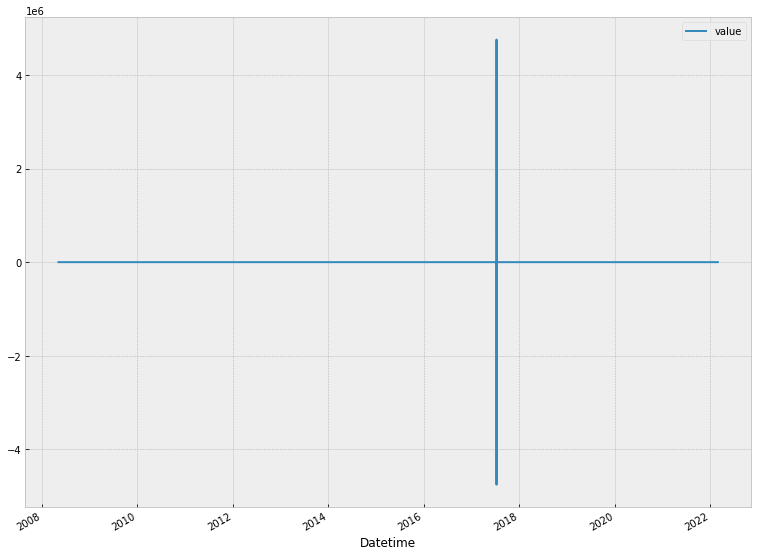

In [4]:
df1 = GTWYElec.copy()

df1.plot()

<AxesSubplot:xlabel='Datetime'>

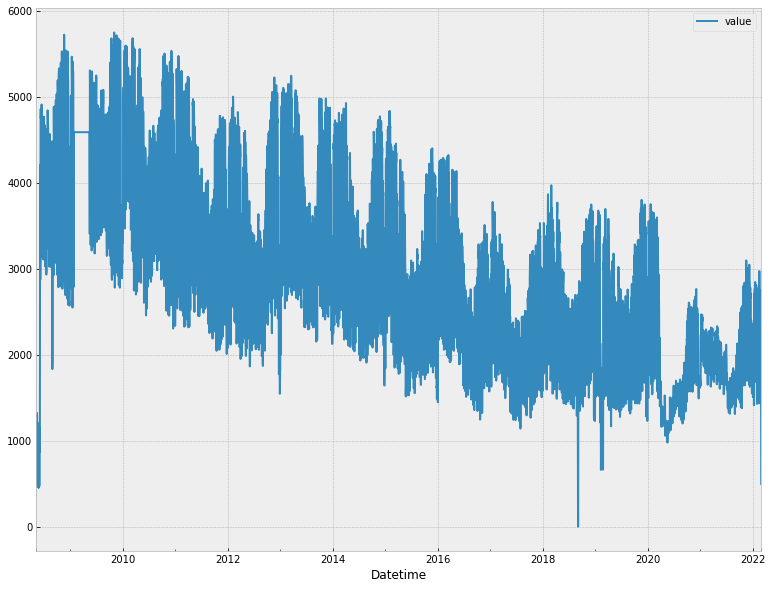

In [5]:
daily = GTWYElec.resample(rule='d').sum().copy()

daily.plot()

<AxesSubplot:xlabel='Datetime'>

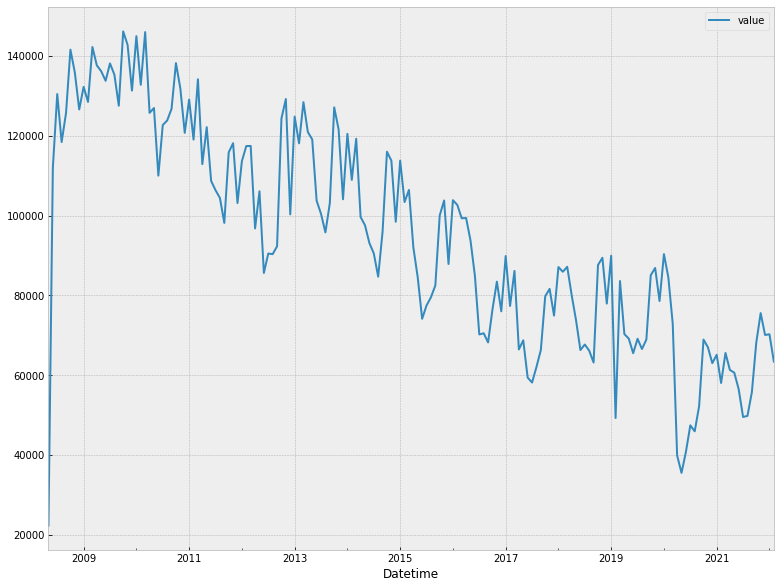

In [6]:
month = GTWYElec.resample(rule='m').sum().copy()

month.plot()

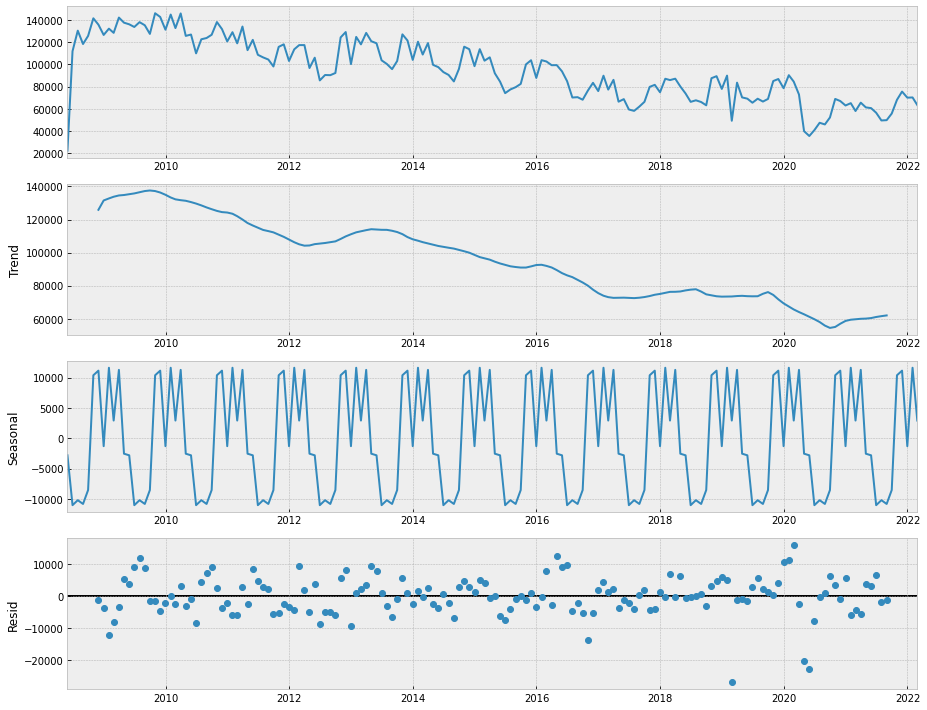

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(month, model='additive')

fig = decomposition.plot()

In [8]:
df = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\All_GTWY_Daily_Dataset.csv', index_col=0, parse_dates=True)

df.head()

,Electric,Water,Gas
Datetime,,,
2008-05-23,1020.471,4.899,226.403
2008-05-24,467.622,0.063,222.908
2008-05-25,454.380,0.053,229.897
2008-05-26,466.604,0.140,235.855
2008-05-27,453.752,0.198,223.238


<ipython-input-9-12573834937f>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


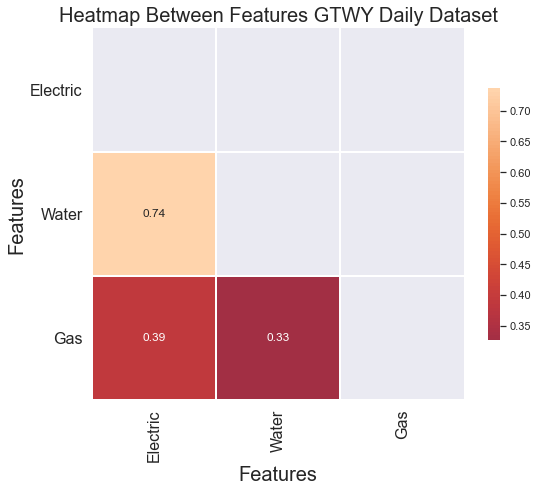

In [9]:
plt.figure(figsize=(8,8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(font_scale=1)
sns.heatmap(corr, mask=mask, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.xlabel('Features',fontsize=20, ha='center')
plt.ylabel('Features',fontsize=20, ha='center')
plt.title('Heatmap Between Features GTWY Daily Dataset',fontsize=20, ha='center')
plt.tick_params(labelsize=16)
plt.ylim(len(df.columns), 0)
plt.tight_layout()

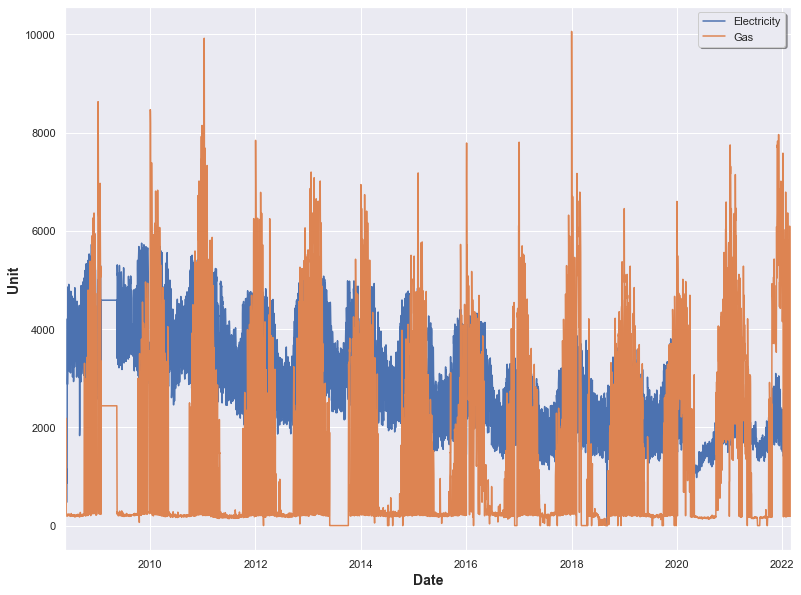

In [10]:
df.Electric.plot(label='Electricity')
df.Gas.plot(label='Gas')
plt.xlabel('Date', fontweight='bold',  fontsize=14)
plt.ylabel('Unit', fontweight='bold',  fontsize=14)
plt.legend(shadow=True)

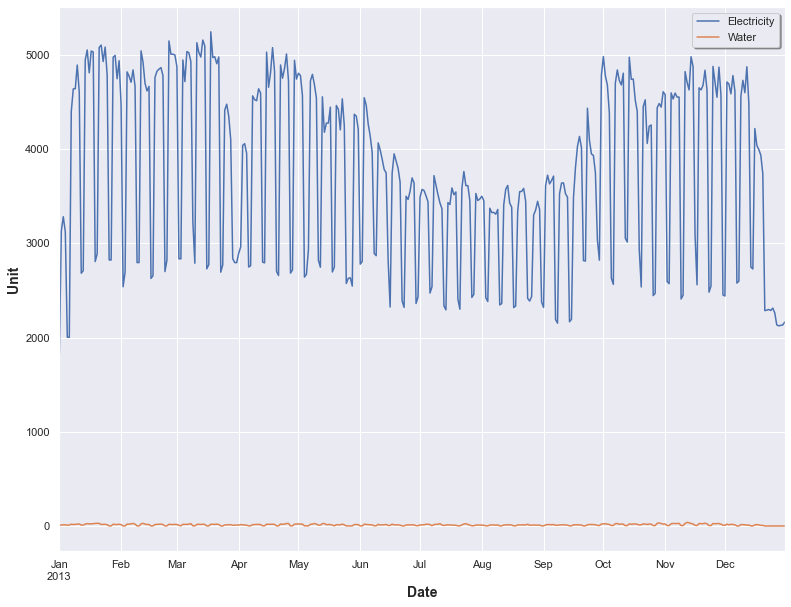

In [11]:
df.Electric.loc['2013'].plot(label='Electricity')
df.Water.loc['2013'].plot(label='Water')
plt.xlabel('Date', fontweight='bold',  fontsize=14)
plt.ylabel('Unit', fontweight='bold',  fontsize=14)
plt.legend(shadow=True)

<AxesSubplot:xlabel='Datetime'>

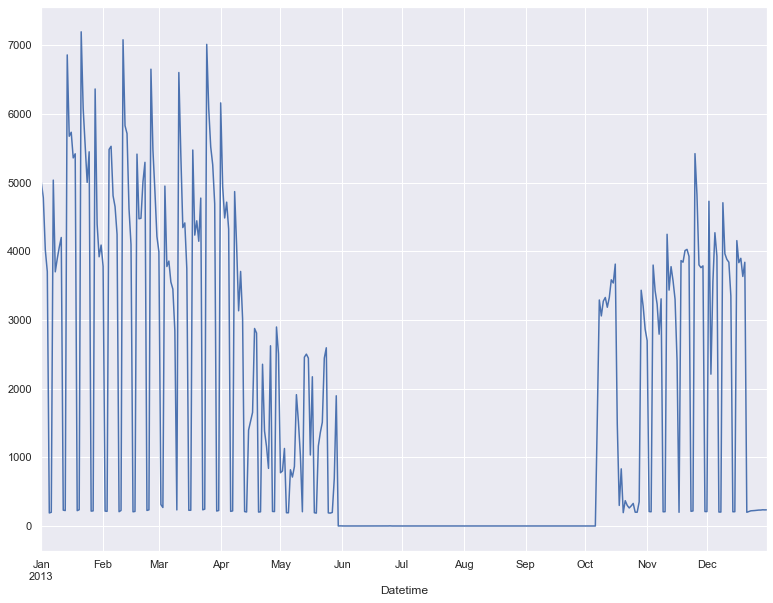

In [45]:
df.Gas.loc['2013'].plot()

<AxesSubplot:xlabel='Datetime'>

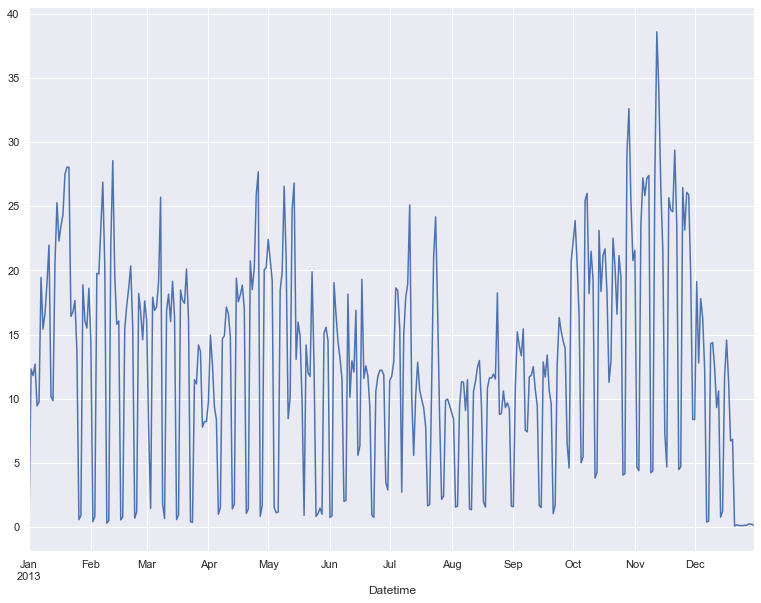

In [44]:
df.Water.loc['2013'].plot()

# Feature Importance

In [40]:
df2 = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\GTWYDaily.csv', index_col=0, parse_dates=True)

df2.head()

,Electric,Water,Gas,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,,,
2008-05-23,1020.471,4.899,226.403,13.193333,9.482083,1013.916667,78.416667,3.830833
2008-05-24,467.622,0.063,222.908,12.617500,8.603750,1013.958333,76.875000,7.959167
2008-05-25,454.380,0.053,229.897,11.202083,9.725417,1014.250000,90.625000,7.675000
2008-05-26,466.604,0.140,235.855,12.089167,8.680417,1014.333333,79.750000,9.237917
2008-05-27,453.752,0.198,223.238,11.814583,10.532500,1011.708333,92.000000,4.222917


In [41]:
from sklearn.model_selection import *

X = df2.drop('Electric', axis=1)
y = df2['Electric']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=1, 
    max_depth=7,
)

xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

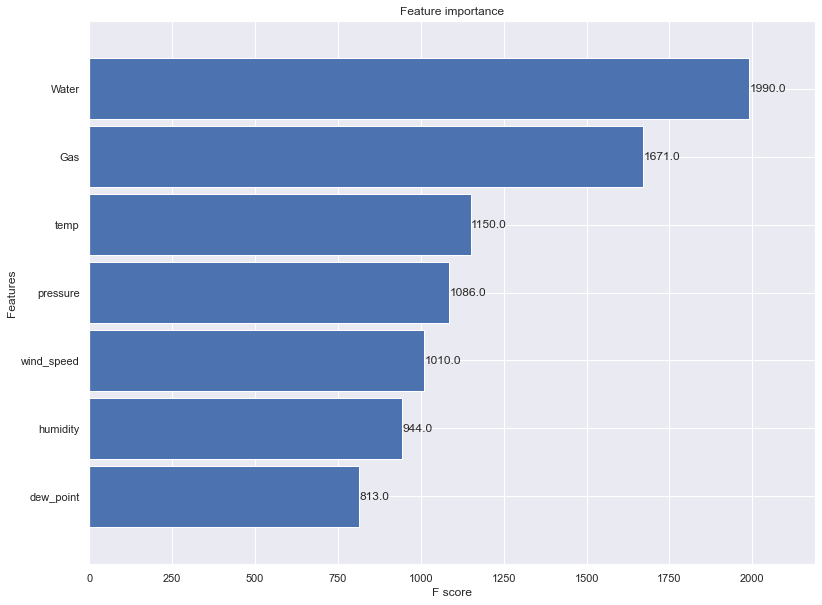

In [43]:
from xgboost import plot_importance

feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [19]:
from statsmodels.tsa.stattools import adfuller

X = df.Electric.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

C:\Users\moham\AppData\Roaming\Python\Python39\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


ADF Statistic: -3.446605
p-value: 0.009469
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [20]:
from statsmodels.tsa.stattools import adfuller

X = df.Gas.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.618122
p-value: 0.000120
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [21]:
from statsmodels.tsa.stattools import adfuller

X = df.Water.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.722182
p-value: 0.000001
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
